# 🧠 **Word Embedding**
Bu ders notunda, word embedding kavramını sıfırdan ileri düzeye adım adım öğreneceksiniz.

> **Teorik açıklamalar, pratik kod örnekleri ve uygulamalar ile NLP'de metin temsili için profesyonel bir yol haritası sunulmuştur.**

---

<div style="background-color:#ffe4b5; border-radius:8px; padding:10px; border:1px solid #f4a460;">
  <span style="font-size:1.2em;">📚 <b>Flashcard:</b> <b>Word Embedding</b> nedir?</span><br>
  <span style="color:#d2691e;">Kelime vektörleri, metinlerin anlamını sayısal olarak temsil eder.</span>
</div>


## 🏷️ <span style="color:#007acc;"><b>1. Word Embedding Nedir?</b></span>
Word embedding, kelimeleri **sayısal vektörler** olarak temsil etme yöntemidir.

- <span style="color:#228B22;">Kelimeler arasındaki <b>anlamsal benzerlikleri</b> yakalar.</span>
- <span style="color:#228B22;">NLP modellerinin metni <b>daha iyi anlamasını</b> sağlar.</span>

**Popüler Yöntemler:**
- <span style="color:#4169e1;">Word2Vec (Google)</span> 🟦
- <span style="color:#e1306c;">FastText (Facebook/Meta)</span> 🟥
- <span style="color:#ff8c00;">GloVe (Stanford)</span> 🟧

<div style="background-color:#e6f7ff; border-radius:8px; padding:10px; border:1px solid #b3e0ff;">
  <span style="font-size:1.1em;">💡 <b>Flashcard:</b> <b>Word2Vec</b> ve <b>FastText</b> arasındaki fark nedir?</span><br>
  <span style="color:#007acc;">Word2Vec kelime ilişkilerini öğrenir, FastText ise kelimeleri karakter n-gramlarına böler.</span>
</div>


## 🧹 <span style="color:#d2691e;"><b>2. Tokenizasyon ve Ön İşleme</b></span>
Metin verisi üzerinde ilk adım, kelimeleri ayırmak ve temizlemektir.

- <span style="color:#8b0000; font-weight:bold;">Küçük harfe çevirme</span>
- <span style="color:#8b0000; font-weight:bold;">Noktalama ve özel karakterleri temizleme</span>
- <span style="color:#8b0000; font-weight:bold;">Gereksiz kelimeleri çıkarma</span>

<div style="background-color:#fffacd; border-radius:8px; padding:10px; border:1px solid #ffd700;">
  <span style="font-size:1.1em;">📝 <b>Flashcard:</b> <b>Tokenizasyon</b> nedir?</span><br>
  <span style="color:#b8860b;">Metni kelimelere veya alt birimlere ayırma işlemidir.</span>
</div>


In [1]:
!pip install gensim

import pandas as pd
import re
from gensim.utils import simple_preprocess

def clean_text(text):
    text = text.lower()
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    text = ' '.join([word for word in text.split() if len(word) > 2])
    return text

sample = 'Merhaba! NLP ile 2025 yılında harika işler yapacağız.'
print(clean_text(sample))

merhaba nlp ile yılında harika işler yapacağız


## 🤖 <span style="color:#4169e1;"><b>3. Word2Vec ve FastText Algoritmaları</b></span>
Word2Vec ve FastText, kelimeleri vektörlere dönüştüren iki güçlü algoritmadır.

- <span style="color:#4169e1; font-weight:bold;">Word2Vec:</span> Kelime ilişkilerini öğrenir. CBOW ve Skip-gram mimarileri vardır.
- <span style="color:#e1306c; font-weight:bold;">FastText:</span> Kelimeleri karakter n-gramlarına böler, nadir kelimeler için avantaj sağlar.

<div style="background-color:#f0f8ff; border-radius:8px; padding:10px; border:1px solid #add8e6;">
  <span style="font-size:1.1em;">🧩 <b>Flashcard:</b> <b>CBOW</b> ve <b>Skip-gram</b> nedir?</span><br>
  <span style="color:#4169e1;">CBOW: Çevredeki kelimelerden hedef kelimeyi tahmin eder.<br>Skip-gram: Hedef kelimeden çevredeki kelimeleri tahmin eder.</span>
</div>


In [2]:
from gensim.models import Word2Vec, FastText
sentences = [
    'Köpek çok tatlı bir hayvandır.',
    'Köpekler evcil hayvanlardır.',
    'Kediler genellikle bağımsız hareket etmeyi severler.',
    'Köpekler sadık ve dost canlısı hayvanlardır.',
    'Hayvanlar insanlar için iyi arkadaşlardır.'
]
tokenized = [simple_preprocess(s) for s in sentences]
w2v_model = Word2Vec(sentences=tokenized, vector_size=50, window=5, min_count=1, sg=0)
ft_model = FastText(sentences=tokenized, vector_size=50, window=5, min_count=1, sg=0)
print(w2v_model.wv.most_similar('köpek'))

[('insanlar', 0.3374485671520233), ('hayvandır', 0.1711786985397339), ('hayvanlar', 0.16557441651821136), ('köpekler', 0.16078656911849976), ('çok', 0.13821306824684143), ('bir', 0.1166624128818512), ('severler', 0.11388096213340759), ('etmeyi', 0.09678184986114502), ('kediler', 0.07390204817056656), ('bağımsız', 0.04905164986848831)]


## 📊 <span style="color:#008b8b;"><b>4. Görselleştirme: PCA ile Boyut İndirgeme</b></span>
Kelime vektörlerini **2D veya 3D** olarak görselleştirmek için PCA kullanılır.

<div style="background-color:#e0ffff; border-radius:8px; padding:10px; border:1px solid #20b2aa;">
  <span style="font-size:1.1em;">🎨 <b>Flashcard:</b> <b>PCA</b> nedir?</span><br>
  <span style="color:#008b8b;">PCA, yüksek boyutlu veriyi daha az boyuta indirerek görselleştirmeyi kolaylaştırır.</span>
</div>


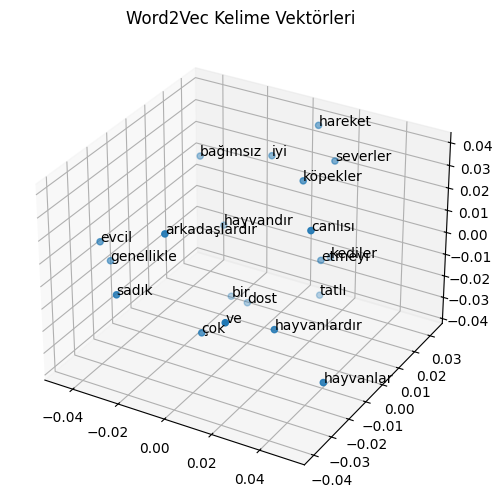

In [3]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
def plot_word_embedding(model, title):
    word_vectors = model.wv
    words = list(word_vectors.index_to_key)[:20]
    vectors = [word_vectors[word] for word in words]
    pca = PCA(n_components=3)
    reduced = pca.fit_transform(vectors)
    fig = plt.figure(figsize=(8,6))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(reduced[:,0], reduced[:,1], reduced[:,2])
    for i, word in enumerate(words):
        ax.text(reduced[i,0], reduced[i,1], reduced[i,2], word)
    ax.set_title(title)
    plt.show()
plot_word_embedding(w2v_model, 'Word2Vec Kelime Vektörleri')

## 🗂️ <span style="color:#6a5acd;"><b>5. Gerçek Veri ile Uygulama: IMDB Dataset</b></span>
Büyük veriyle word embedding eğitimi ve kelime vektörlerinin kümeleme ile analizi.

<div style="background-color:#f5f5dc; border-radius:8px; padding:10px; border:1px solid #deb887;">
  <span style="font-size:1.1em;">🗃️ <b>Flashcard:</b> <b>Kümeleme</b> nedir?</span><br>
  <span style="color:#6a5acd;">Kümeleme, benzer özelliklere sahip verileri gruplandırma işlemidir.</span>
</div>


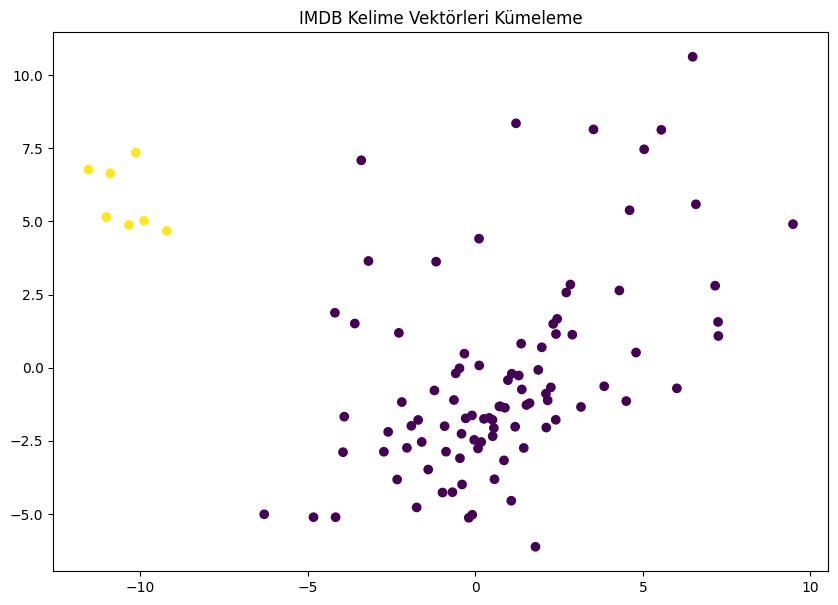

In [6]:
df = pd.read_csv('/content/IMDB Dataset.csv')
documents = df['review']
cleaned = [clean_text(doc) for doc in documents]
tokenized_docs = [simple_preprocess(doc) for doc in cleaned]
model = Word2Vec(sentences=tokenized_docs, vector_size=50, window=5, min_count=1, sg=0)
word_vectors = model.wv
words = list(word_vectors.index_to_key)[:100]
vectors = [word_vectors[word] for word in words]
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(vectors)
clusters = kmeans.labels_
pca = PCA(n_components=2)
reduced = pca.fit_transform(vectors)
plt.figure(figsize=(10,7))
plt.scatter(reduced[:,0], reduced[:,1], c=clusters, cmap='viridis')
plt.title('IMDB Kelime Vektörleri Kümeleme')
plt.show()